In [1]:
import numpy as np
import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt

import cv2
import glob
import xml.etree.ElementTree as ET


In [89]:
def plot_bndbox(imgfile, xmlfile):
    # find and plot bndbox for all objects

    tree = ET.parse(xmlfile)
    root = tree.getroot()

    img = cv2.imread(imgfile)
    for object in root.findall('object'):
        object_name = object.find('name').text
        Xmin = int(object.find('bndbox').find('xmin').text )
        Ymin = int(object.find('bndbox').find('ymin').text )
        Xmax = int(object.find('bndbox').find('xmax').text )
        Ymax = int(object.find('bndbox').find('ymax').text )
        # print(Xmin, Ymin, Xmax, Ymax)

        # draw a rectangle box
        color = (4, 250, 7) # the color of bndbox

        cv2.rectangle(img, (Xmin, Ymin), (Xmax, Ymax), color, 2) 
        
    return img


In [58]:
imgfiles = glob.glob('*.jpg')
imgfiles.sort()

In [95]:
xmlfiles = glob.glob('*.xml')
xmlfiles.sort()

In [96]:
xmlfiles

['0_2.xml',
 '10_8.xml',
 '12_1.xml',
 '17_0.xml',
 '17_1.xml',
 '18_0.xml',
 '20_3.xml',
 '22_6.xml',
 '3_0.xml',
 '3_1.xml',
 '3_2.xml',
 '3_4.xml',
 '4_4.xml',
 '5_8.xml',
 '6_4.xml',
 '6_5.xml',
 '6_7.xml',
 '6_8.xml',
 '7_0.xml']

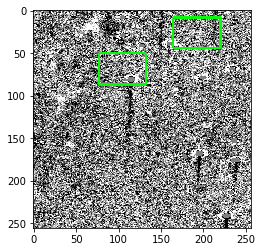

In [81]:
i = 4
plt.imshow(plot_bndbox(imgfiles[i], xmlfiles[i]) )

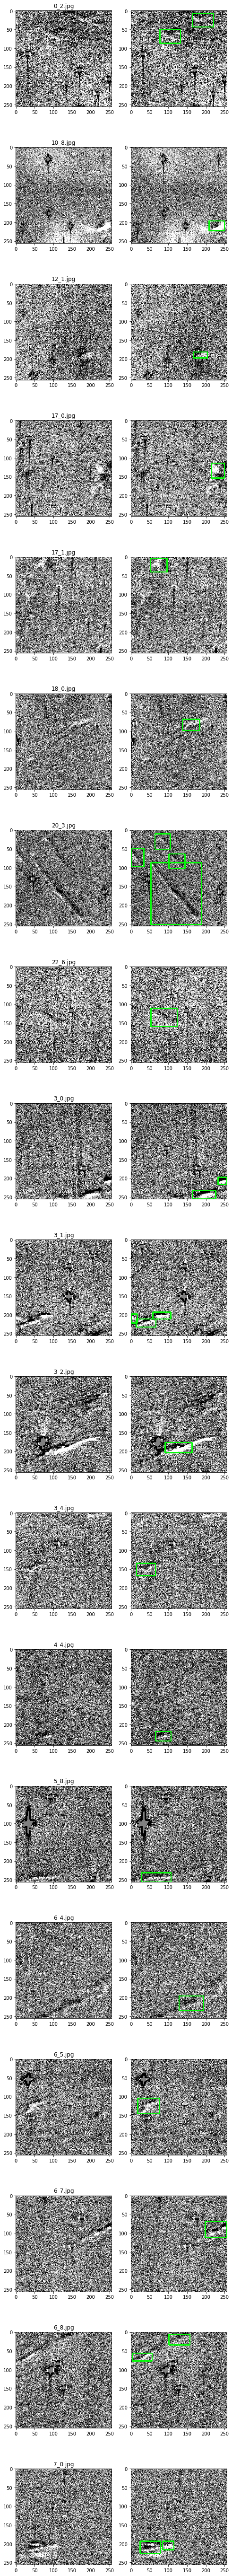

In [101]:
# plot all images with boundbox
s = len(imgfiles)
fig, axes = plt.subplots(nrows=s, ncols=2, figsize=(8, 100))
for i, imgfile in enumerate(imgfiles):
    # ax = axes.ravel()  # return a flattened array
    img = cv2.imread(imgfile)
    axes[i, 0].imshow(img)
    axes[i, 0].set_title( imgfile )
    img_box = plot_bndbox(imgfile, xmlfiles[i])
    axes[i, 1].imshow(img_box)
    #plt.tight_layout()
